### Step 1: Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import zipfile
import warnings
import os
import cv2

### Step 2: Load and prepare data

In [5]:
path=os.listdir('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

### Step 3: Data analysis

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [9]:
X.shape

(1222, 200, 200)

### Step 4: Data Visualisation

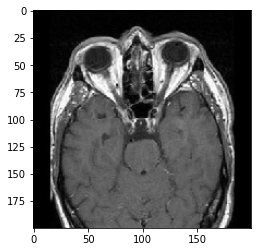

In [10]:
plt.imshow(X[0], cmap='gray')

## Prepare data

In [11]:
X_updated = X.reshape(len(X),-1)
X_updated.shape

(1222, 40000)

In [12]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

### Step 5: Split data

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [14]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Step 6: Feature Scaling

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


## Feature Selection: PCA

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [17]:
 #print(pca_train.shape, pca_test.shape)
 #print(pca.n_components_)
 #print(pca.n_features_)

### Step 7: Model Training

In [18]:
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [19]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

### Step 8: Evaluation

In [20]:
print("Training Score:" , lg.score(pca_train,ytrain))
print("Testing Score:" , lg.score(pca_test,ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [21]:
print("Training Score: ", sv.score(pca_train, ytrain))
print("Testing Score: ", sv.score(pca_test,ytest))

Training Score:  0.9938587512794268
Testing Score:  0.963265306122449


### Step 9: Prediction

In [22]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [23]:
pred[6]

0

In [24]:
ytest[36]

1

### Step 10: Testing (On test dataset)

In [25]:
dec = {0:'No Tumour', 1:'Positive'}

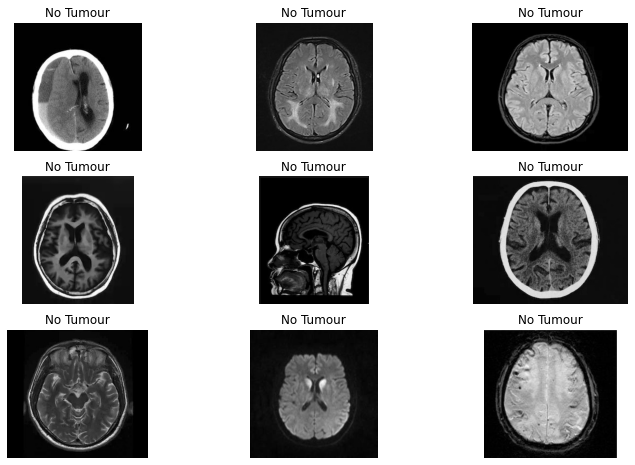

In [48]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

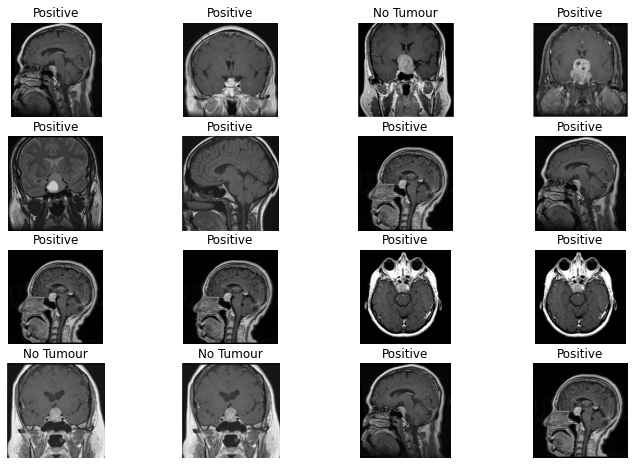

In [50]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/User/OneDrive/Desktop/IBS/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1